<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-18824-1659690548/blob/main/Assignments/Team%20Member%20-%20S%20Jothika/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT-3**

# **TITLE- Abalone Age Prediction**

# **TASK - Building a Regression Model** 

# **1.Download & Load the Dataset** 

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'/content/abalone.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
#target variable of the abalone age prediction is the abalone age which is calculated using the given (Rings +1.5) and then assigning it to the dataset 
df['Abalone_Age'] = df['Rings'] + 1.5
df = df.drop('Rings', axis = 1)

#  **2.Performing the Vizualizations**



> **2.1 Univariate Analysis**

The purpose of univariate data analysis is to summarize and describe one data or one variable.Univariate data visualization plots help us comprehend the enumerative properties as well as a descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.





In [ ]:
print('this dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

this dataset has 4147 observations with 9 features.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Abalone_Age     4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
count,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000,4147.000000
mean,0.522571,0.406716,0.139043,0.819410,0.355267,0.178401,0.236546,11.397516
std,0.119276,0.098590,0.041578,0.478566,0.216282,0.106401,0.136806,3.163248
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.440500,0.185000,0.092500,0.130000,9.500000
50%,0.540000,0.425000,0.140000,0.795000,0.334500,0.169000,0.230000,10.500000
75%,0.615000,0.480000,0.165000,1.144500,0.498500,0.250000,0.325000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.590000,1.005000,24.500000


**Observations from above information:**
 
 *No missing values

 *All columns are numerical values except the column 'Sex',which is categorical feature

 *Each feature has difference scale range

In [ ]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age'],
      dtype='object')

In [ ]:
#Numerical & Categorical Features
numerical_features= df.select_dtypes(include= [np.number]). columns
categorical_features= df.select_dtypes(include= [np.object]). columns

In [ ]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Abalone_Age'],
      dtype='object')

In [ ]:
categorical_features

Index(['Sex'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f265de00cd0>,
      dtype=object)

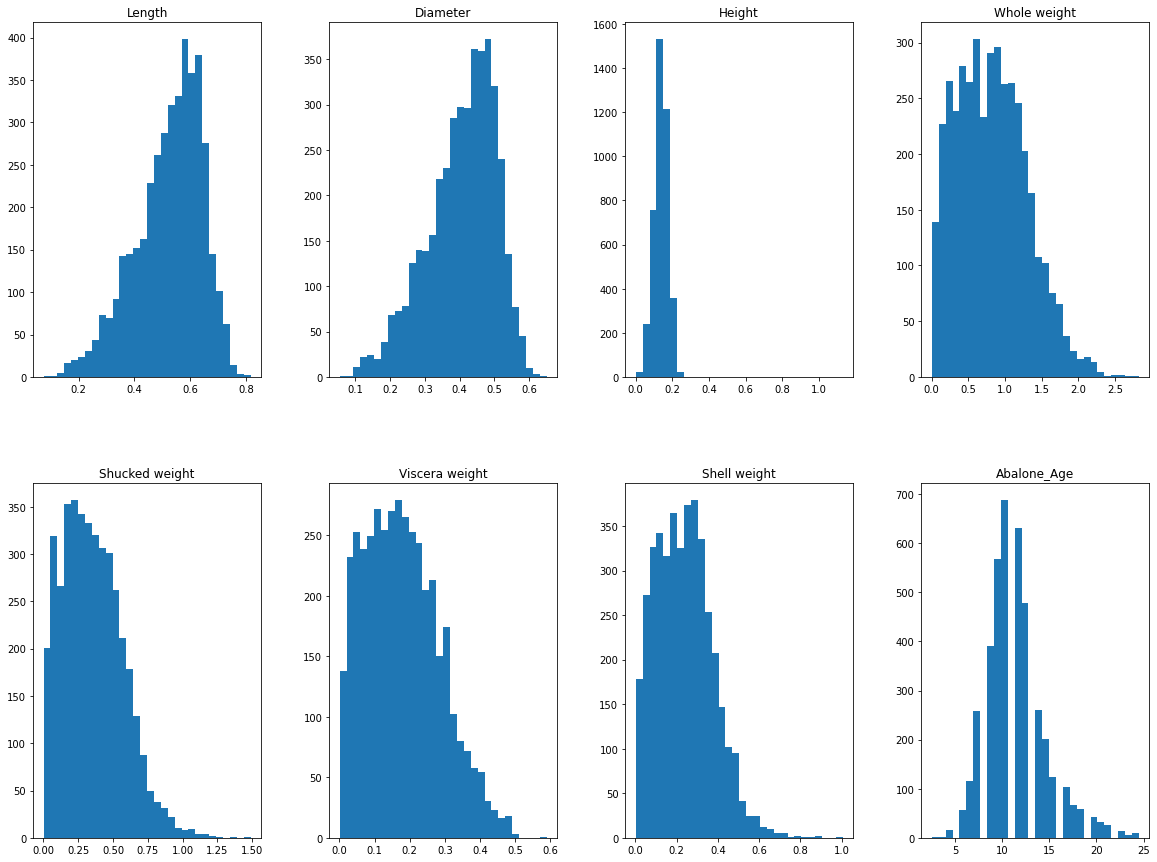

In [ ]:
df.hist(figsize=(20,15), grid=False, layout=(2, 4), bins= 30)

In [ ]:
from scipy.stats import skew
skew_values= skew(df[numerical_features], nan_policy= 'omit')

temp= pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), pd.DataFrame(list(skew_values), columns=['skewness degree'])], axis=1)
temp.sort_values(by= 'skewness degree', ascending= False)

,Features,skewness degree
2,Height,3.207064
7,Abalone_Age,0.991444
4,Shucked weight,0.633494
6,Shell weight,0.589566
5,Viscera weight,0.471349
3,Whole weight,0.458278
1,Diameter,-0.626675
0,Length,-0.659684


**NOTE:**

For normally distributed data, the skewness should be about 0. 
For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution.


**Observations:**
*Height has highest skewness followed by Abalone Age*

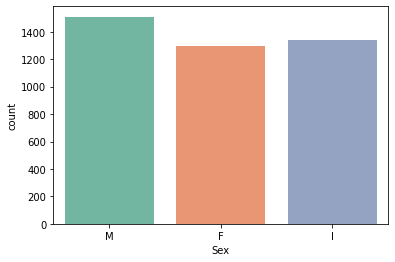

In [ ]:
sns.countplot(x= 'Sex', data= df, palette= 'Set2')



> **2.2 Bivariate Analysis**



Bi-variate Analysis finds out the relationship between two variables. Using bi-variate analysis association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables.


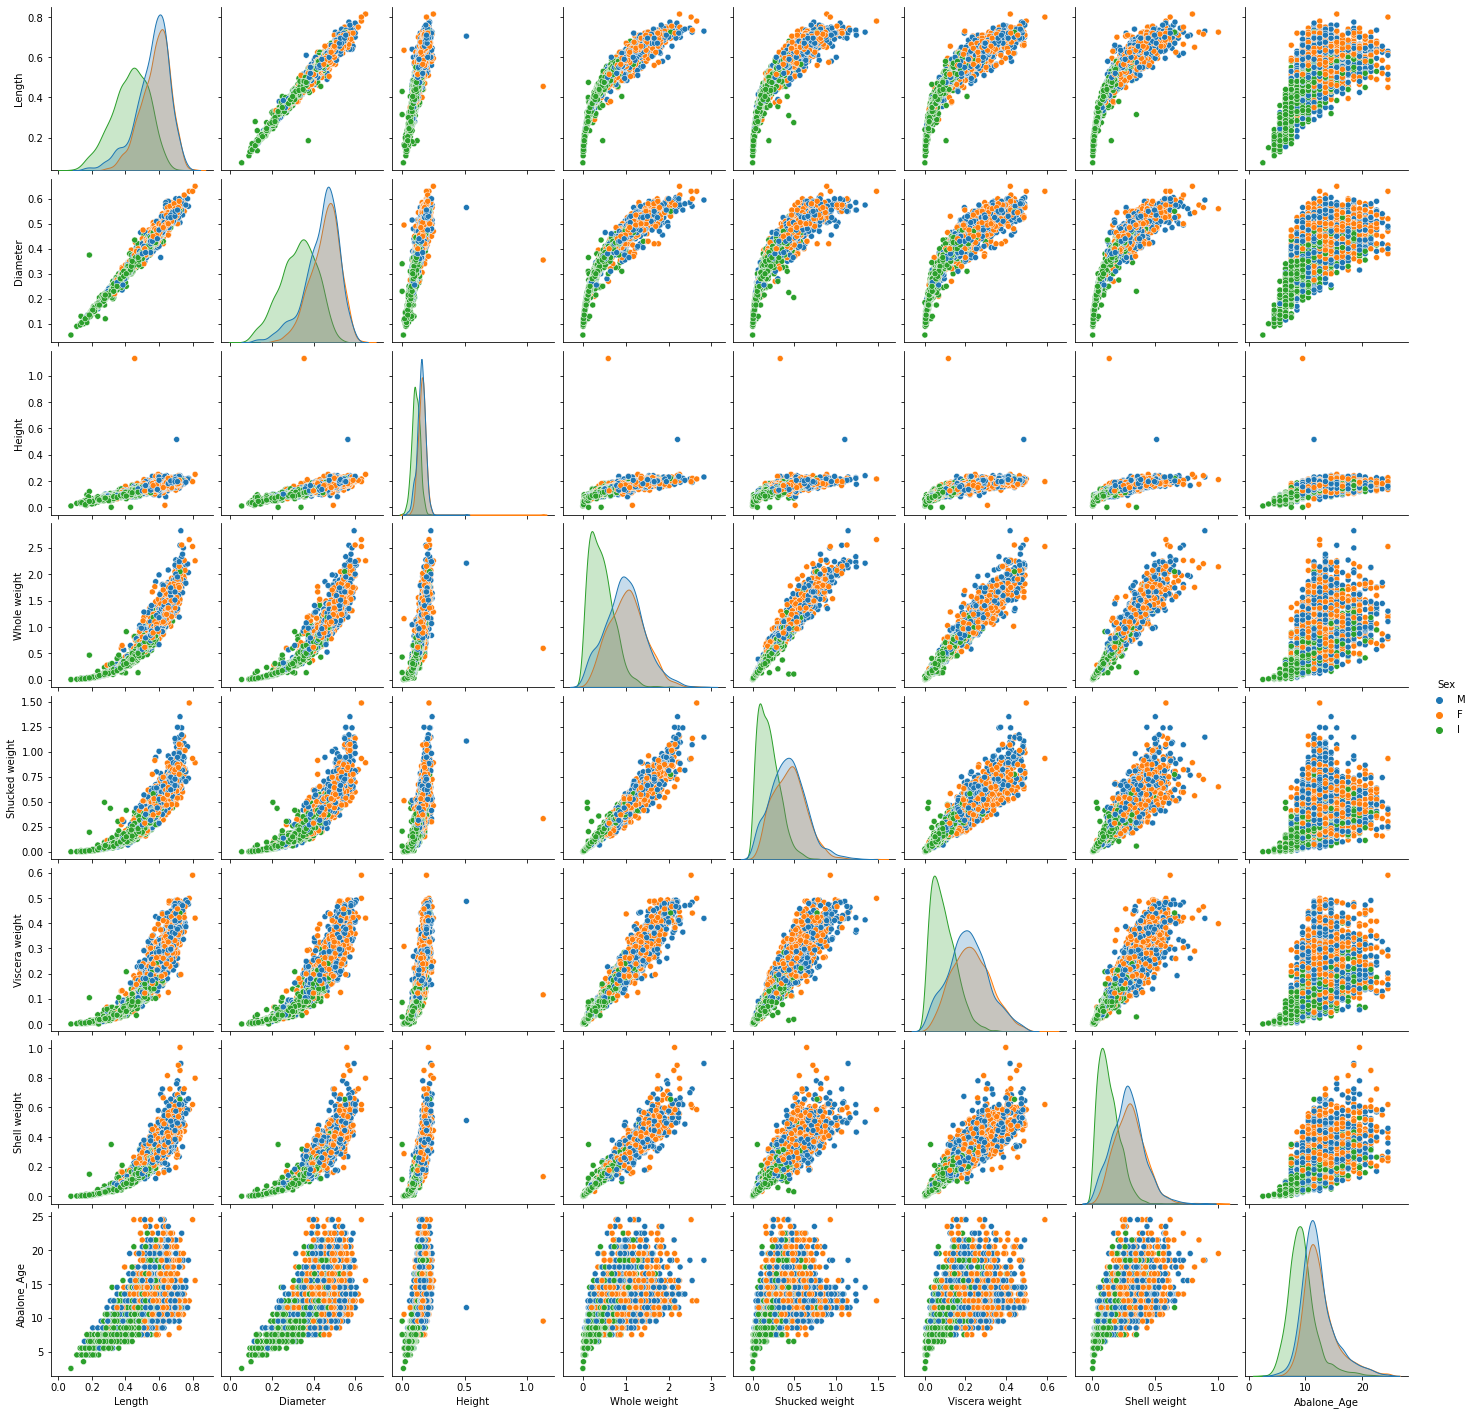

In [ ]:
sns.pairplot(df, hue='Sex', diag_kind='kde')
plt.show()

**observations:**

Length is linearly correlated with Diameter of Abalone shell while
Non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

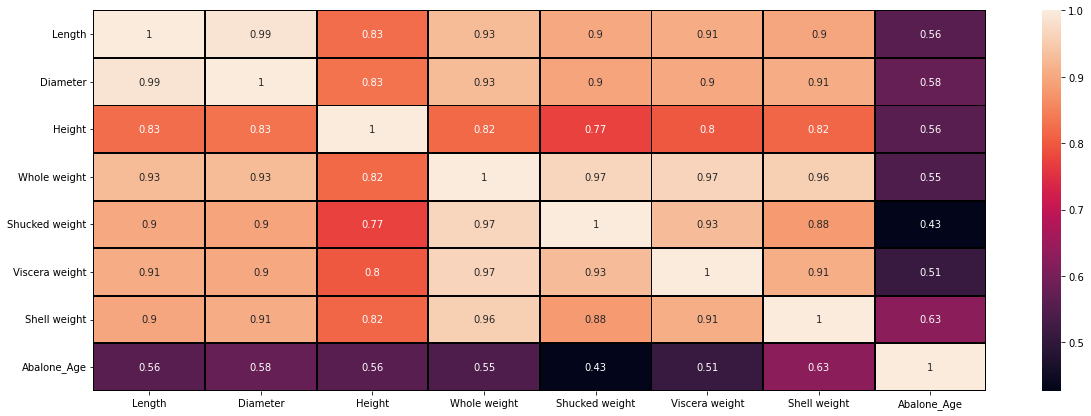

In [ ]:
lw= 0.8
lc= "black"
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features]. corr(), annot= True, linewidth= lw, linecolor= lc)

**Observations:**

   *  Whole Weight is almost linearly varying with all other features except age
   * Height has least linearity with remaining features
   *  Age is most linearly proprtional with Shell Weight followed by Diameter and length
   * Age is least correlated with Shucked Weight



> **2.3 Multivariate Analysis**

 Multivariate analysis encompasses all statistical techniques that are used to analyze more than two variables at once. The aim is to find patterns and correlations between several variables simultaneously—allowing for a much deeper, more complex understanding of a given scenario.



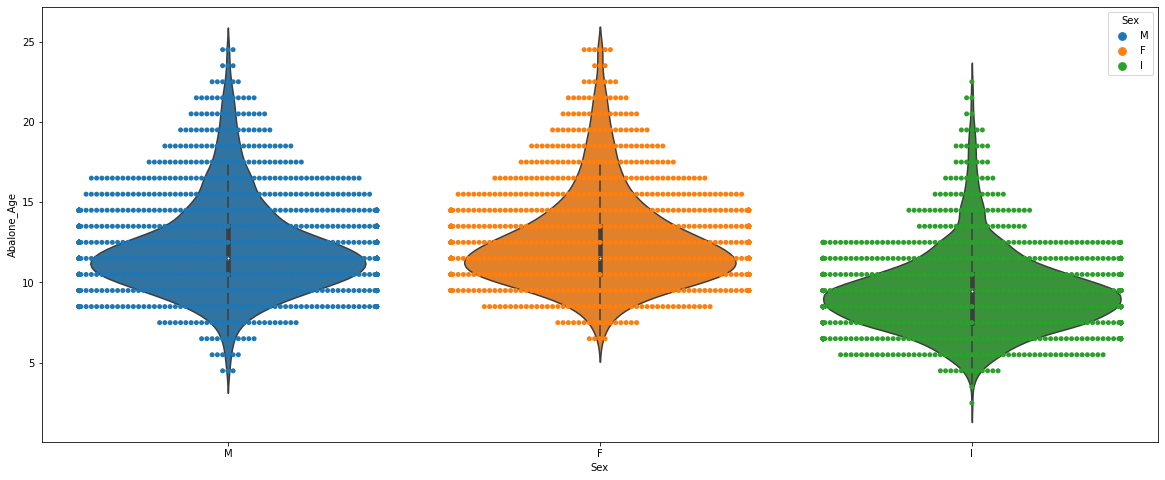

In [ ]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x = 'Sex', y = 'Abalone_Age', data = df, hue = 'Sex')
sns.violinplot(x= 'Sex' , y= 'Abalone_Age', data= df)

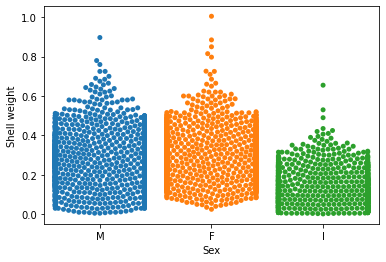

In [ ]:
sns.swarmplot(x= df['Sex'], y= df['Shell weight'])


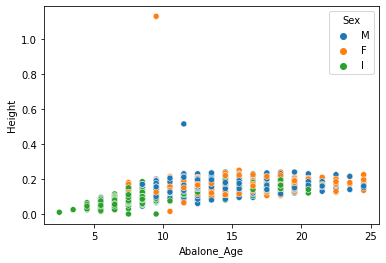

In [ ]:
sns.scatterplot(x= df.Abalone_Age, y= df['Height'], hue= df['Sex'])

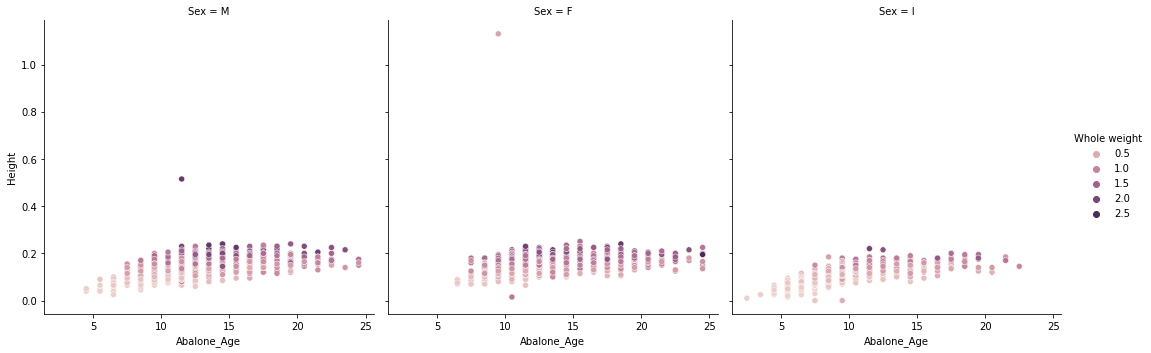

In [ ]:
sns.relplot(data= df, x= 'Abalone_Age', y= 'Height', hue= 'Whole weight', col= 'Sex')

# **3.Descriptive Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4147.0,0.522571,0.119276,0.0750,0.4500,0.5400,0.6150,0.8150
Diameter,4147.0,0.406716,0.098590,0.0550,0.3500,0.4250,0.4800,0.6500
Height,4147.0,0.139043,0.041578,0.0000,0.1150,0.1400,0.1650,1.1300
Whole weight,4147.0,0.819410,0.478566,0.0020,0.4405,0.7950,1.1445,2.8255
Shucked weight,4147.0,0.355267,0.216282,0.0010,0.1850,0.3345,0.4985,1.4880
Viscera weight,4147.0,0.178401,0.106401,0.0005,0.0925,0.1690,0.2500,0.5900
Shell weight,4147.0,0.236546,0.136806,0.0015,0.1300,0.2300,0.3250,1.0050
Abalone_Age,4147.0,11.397516,3.163248,2.5000,9.5000,10.5000,12.5000,24.5000


In [ ]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Abalone_Age']].mean().sort_values('Abalone_Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.559397,0.437662,0.150765,0.977174,0.426446,0.211948,0.278792,12.168212
F,0.577896,0.453764,0.157548,1.037585,0.442462,0.228812,0.299584,12.578764


# **4.Checking for Missing Values**

In [ ]:
#Missing values in the given datset
missing_values= df.isnull().sum().sort_values(ascending= False)

In [ ]:
missing_values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Abalone_Age       0
dtype: int64

**Observations:** *No Missing values*

# **5.Finding the Outliers & Handling them**

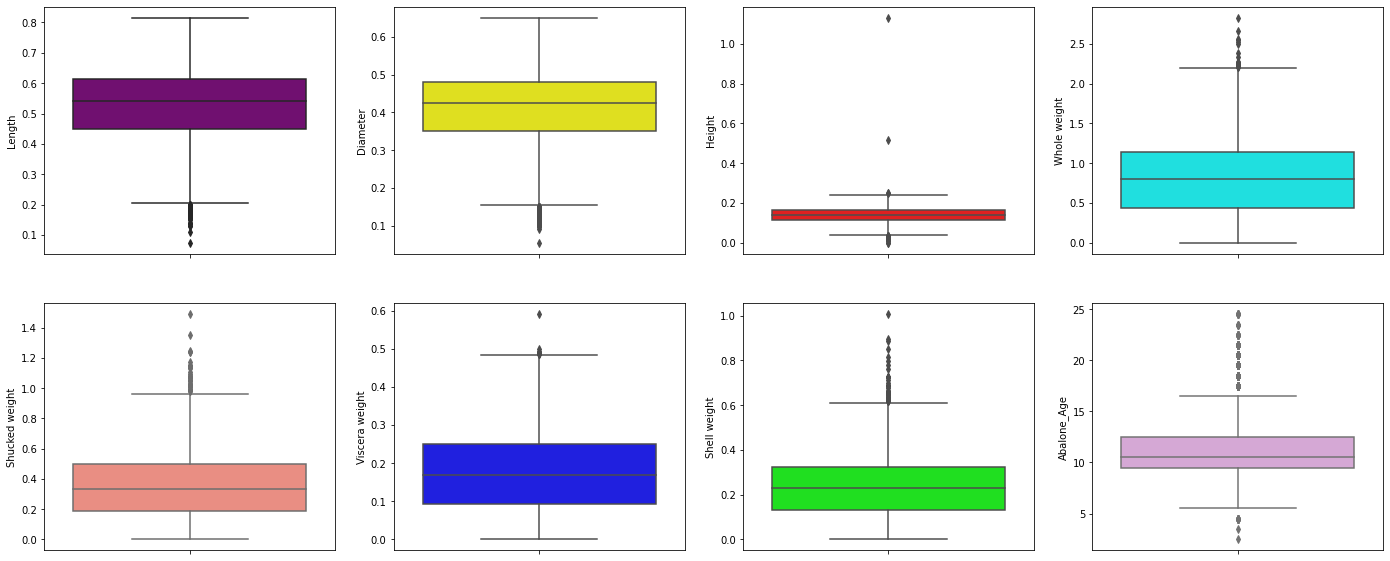

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'purple')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'yellow')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'red')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'blue')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'Abalone_Age', data = df, color = 'plum')

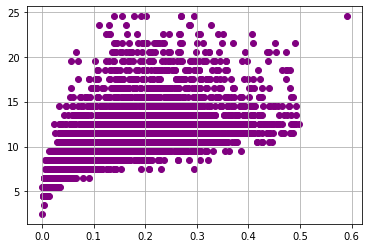

In [ ]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color="purple")
plt.grid(True)

In [ ]:
#outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['Abalone_Age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['Abalone_Age'] > 25)].index, inplace=True)

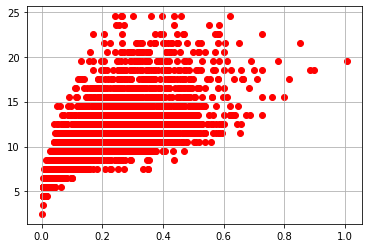

In [ ]:
var= 'Shell weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='red')
plt.grid(True)

In [ ]:
df.drop(df [(df ['Shell weight']> 0.6) & (df['Abalone_Age'] < 25)].index, inplace=True)
df.drop(df [(df ['Shell weight']<0.8) & (df['Abalone_Age'] > 25)].index, inplace=True)

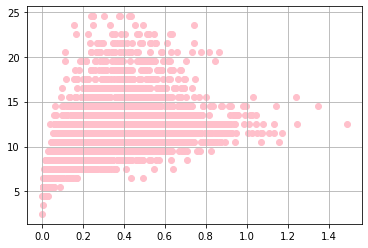

In [ ]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='pink')
plt.grid(True)

In [ ]:
df.drop(df[(df['Shucked weight']>= 1) & (df['Abalone_Age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['Abalone_Age'] > 20)].index, inplace=True)

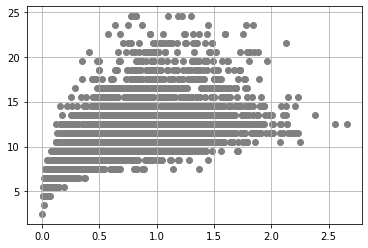

In [ ]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='grey')
plt.grid(True)

In [ ]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['Abalone_Age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['Abalone_Age'] > 25)].index, inplace=True)

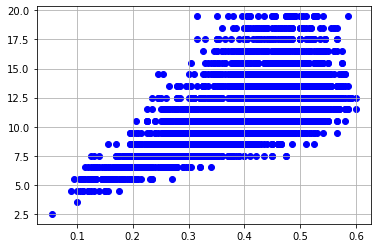

In [ ]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='blue')
plt.grid(True)

In [ ]:
df.drop(df[(df['Diameter']<0.1) & (df['Abalone_Age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Abalone_Age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['Abalone_Age']< 25)].index, inplace=True)

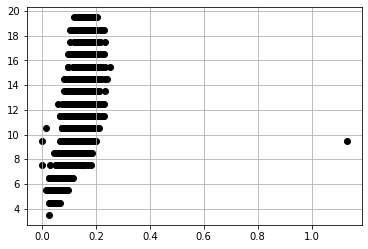

In [ ]:
var = 'Height'
plt.scatter(x = df[var], y = df['Abalone_Age'],color='black')
plt.grid(True)

In [ ]:
df.drop(df[(df['Height']>0.4) & (df['Abalone_Age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['Abalone_Age'] > 25)].index, inplace=True)

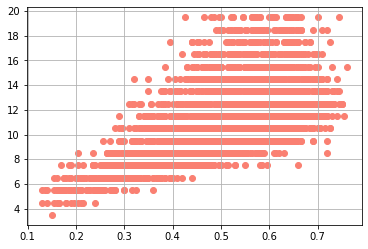

In [ ]:
var = 'Length'
plt.scatter(x = df[var], y = df['Abalone_Age'], color='salmon')
plt.grid(True)

In [ ]:
df.drop(df[(df['Length']<0.1) & (df['Abalone_Age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['Abalone_Age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['Abalone_Age']< 25)].index, inplace=True)

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
count,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000
mean,0.518168,0.402955,0.136972,0.791814,0.345022,0.173504,0.227166,11.127284
std,0.117643,0.097127,0.037248,0.451790,0.205040,0.102633,0.125889,2.764955
min,0.130000,0.095000,0.000000,0.010500,0.004500,0.000500,0.003500,3.500000
25%,0.445000,0.345000,0.110000,0.428250,0.179250,0.090000,0.125000,9.500000
50%,0.535000,0.420000,0.140000,0.774500,0.326500,0.165000,0.223500,10.500000
75%,0.610000,0.475000,0.165000,1.123750,0.491500,0.245000,0.315250,12.500000
max,0.760000,0.590000,0.250000,2.381000,0.995500,0.492500,0.600000,19.500000


# **6.Categorical Column- Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# transform data
df['Sex'] = encoder.fit_transform(df['Sex'])

In [ ]:
df.head(6)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Abalone_Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5


# **7.Split the data into dependent & independent variables**

In [ ]:
X = df.iloc[:, 0:7]
Y = df['Abalone_Age']

In [ ]:
X.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395


In [ ]:
Y.head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Abalone_Age, dtype: float64

# **8. Scale the independent variables**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# **9. Split the data into training & testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1)

# **10. Build the Model**

*using the Regression the model*

**containing two steps:**



> Training the Model

> Testing the Model





# **11.Train the Model, 12. Test the Model, 13. Measure the performance using metrics.**




*   LINEAR REGRESSION

*   RIDGE
*   DECISION TREE REGRESSION


*   K-NEIGHBORS REGRESSOR



In [ ]:
#importing all the neccessary models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score



*   LINEAR REGRESSION




In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Testing the model
lr_test_pred = lr.predict(x_test)

In [ ]:
lr_test_pred

array([11.78015367, 10.98036805, 12.20470248, ..., 11.66110266,
        5.85691708, 13.06973503])

In [ ]:
#measuring the performance
mse = mean_squared_error(y_test, lr_test_pred)
print('Mean Squared error of testing Set: %2f'%mse)

Mean Squared error of testing Set: 3.655732


In [ ]:
p = r2_score(y_test, lr_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.52


*  RIDGE

In [ ]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)

Ridge(alpha=0.01, normalize=True)

In [ ]:
#Testing the model
ridge_model_pred = ridge_mod.predict(x_test)

In [ ]:
ridge_model_pred 

array([11.62214688, 10.96702103, 12.06628438, ..., 11.4402216 ,
        5.74689978, 12.88778428])

In [ ]:
#Measuring the performance
acc = r2_score(y_test, ridge_model_pred)
print('Score of testing Set: %2f'%acc)

Score of testing Set: 0.509737


*  DECISION TREE REGRESSION

In [ ]:
dt =  DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Testing the model
dt_test_pred = dt.predict(x_test)

In [ ]:
dt_test_pred

array([11.5, 13.5, 16.5, ..., 10.5,  4.5,  9.5])

In [ ]:
#Measuring the Performance
dacc = mean_squared_error(y_test, dt_test_pred)
print('Mean Squared Error of testing Set: %2f'%dacc)

Mean Squared Error of testing Set: 6.492911


*  KNN REGRESSION

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
#Testing the Model
knn_test_pred = knn.predict(x_test)

In [ ]:
knn_test_pred

array([12.25, 10.  , 13.  , ..., 10.5 ,  6.  , 14.5 ])

In [ ]:
#Measuring the Performance
kacc= r2_score(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kacc)

Score of testing Set: 0.393647


In [ ]:
kmse = mean_squared_error(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kmse)

Score of testing Set: 2.693182
